In [93]:
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [94]:
np.random.seed(1232)
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\dep')
data = pd.read_csv("Rand_train.csv", sep=',')
data_val = pd.read_csv("Rand_valid.csv", sep=',')

In [95]:
data.cost = (np.exp(data.cost) - 0.5)*((data.cost != 0) * 1)
data_val.cost = (np.exp(data_val.cost) - 0.5)*((data_val.cost != 0) * 1)
data = shuffle(data).reset_index(drop=True)
data = data.drop(['fmde', 'lxghindx', 'lpi'], axis=1)
data_val = data_val.drop(['fmde', 'lxghindx', 'lpi'], axis=1)

In [96]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
X_val = data_val.iloc[:,1:]
Y_val = data_val.iloc[:,0]

ranking = np.load('ranking.npy')

my_index = X.columns.values[ranking]
X2 = X[my_index]
X2_val = X_val[my_index]

In [97]:
cut = 0
y1 = (Y <= cut) * 1
y2 = (Y > cut) * (-1) * (-Y)
Y2 = np.stack((y1, y2), axis=-1)

y1_val = (Y_val <= cut) * 1
y2_val = (Y_val > cut) * (-1) * (-Y_val)
Y2_val = np.stack((y1_val, y2_val), axis=-1)

In [98]:
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\prog_calc')
from fit5_nn import fit, comb_error

In [99]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc11 = nn.Linear(16, 24, bias=True)
        self.fc12 = nn.Linear(24, 1, bias=True)
        
        self.fc21 = nn.Linear(16, 24)
        self.fc22 = nn.Linear(24, 5)
        self.fc23 = nn.Linear(5, 1)
        
        self.fc31 = nn.Linear(2,2, bias=False)
        
    def disc_activation(self, h):
        v1 = torch.sigmoid(h[:,0])
        v2 = torch.exp(h[:,1])
        return torch.stack((v1, v2), dim=1)
                
    def forward(self, x):
        x1 = torch.tanh(self.fc11(x))
        x1 = self.fc12(x1)
        
        x2 = self.fc21(x)
        x2 = F.relu(self.fc22(x2))
        x2 = self.fc23(x2)              
        
        x3 = torch.cat((x1, x2), 1)
        x3 = self.fc31(x3)
        x3 = self.disc_activation(x3)
        return x3

In [100]:
n_epochs = 5000
lr = 0.001
verbose = 1
n_batches = 6
batch_to_avg = 2
ep_to_check = 10
clipping = 0.20
sig2 = 950000
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining8.pt'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [101]:
def m_error(output, target):
    return comb_error(output, target, sig2)

In [109]:
net = Net1()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining8.pt'
net.load_state_dict(torch.load(PATH, map_location = device))
    
a, b, c = fit(X=X2, X_val=X2_val, Y=Y2, Y_val=Y2_val, net=net, optimizer=optimizer, error=m_error, 
                n_epochs=n_epochs, n_batches=n_batches, batch_to_avg=batch_to_avg, 
                    ep_to_check=ep_to_check, clipping=clipping, PATH=PATH, device=device, 
                                            verbose=verbose, min_val_loss = float('inf'))

#(PENDIENTE)

Epoch 1: Training Loss: 0.8402745028336843, Validation Loss: 0.9506434202194214
Epoch 2: Training Loss: 0.8402750492095947, Validation Loss: 0.9506458640098572
Epoch 3: Training Loss: 0.840267022450765, Validation Loss: 0.9507368206977844
Epoch 4: Training Loss: 0.840272476275762, Validation Loss: 0.9508235454559326
Epoch 5: Training Loss: 0.8402811785538992, Validation Loss: 0.9508287310600281
Epoch 6: Training Loss: 0.840290904045105, Validation Loss: 0.9507808685302734
Epoch 7: Training Loss: 0.840272843837738, Validation Loss: 0.9507278203964233
Epoch 8: Training Loss: 0.8402628401915232, Validation Loss: 0.9507208466529846
Epoch 9: Training Loss: 0.8402633269627889, Validation Loss: 0.9507105946540833
Epoch 10: Training Loss: 0.8402722477912903, Validation Loss: 0.95072340965271
Epoch 11: Training Loss: 0.8402671019236246, Validation Loss: 0.9506151080131531
New Checkpoint Saved into PATH
Epoch 12: Training Loss: 0.8402613798777262, Validation Loss: 0.9506126046180725
Epoch 13: Tr

Epoch 103: Training Loss: 0.8401248753070831, Validation Loss: 0.9504984021186829
Epoch 104: Training Loss: 0.8401263654232025, Validation Loss: 0.9505538940429688
Epoch 105: Training Loss: 0.8401330312093099, Validation Loss: 0.9505786895751953
Epoch 106: Training Loss: 0.8401332497596741, Validation Loss: 0.9505273699760437
Epoch 107: Training Loss: 0.8401264349619547, Validation Loss: 0.9504779577255249
Epoch 108: Training Loss: 0.840120792388916, Validation Loss: 0.9505310654640198
Epoch 109: Training Loss: 0.8401125967502594, Validation Loss: 0.9505940675735474
Epoch 110: Training Loss: 0.8401119013627371, Validation Loss: 0.9506673216819763
Epoch 111: Training Loss: 0.8401086429754893, Validation Loss: 0.9506804943084717
Epoch 112: Training Loss: 0.8401093582312266, Validation Loss: 0.950688362121582
Epoch 113: Training Loss: 0.8401094476381937, Validation Loss: 0.9507129192352295
Epoch 114: Training Loss: 0.8401113450527191, Validation Loss: 0.9507260322570801
Epoch 115: Trainin

Epoch 203: Training Loss: 0.8399853308995565, Validation Loss: 0.9506926536560059
Epoch 204: Training Loss: 0.8399743139743805, Validation Loss: 0.9506940245628357
Epoch 205: Training Loss: 0.8399787942568461, Validation Loss: 0.9507063031196594
Epoch 206: Training Loss: 0.8399857481320699, Validation Loss: 0.9506068825721741
Epoch 207: Training Loss: 0.8399820228417715, Validation Loss: 0.9506223201751709
Epoch 208: Training Loss: 0.8399714827537537, Validation Loss: 0.9505831599235535
Epoch 209: Training Loss: 0.8399673302968343, Validation Loss: 0.950631320476532
Epoch 210: Training Loss: 0.8399614791075388, Validation Loss: 0.9506510496139526
Epoch 211: Training Loss: 0.8399755557378134, Validation Loss: 0.9505736827850342
Epoch 212: Training Loss: 0.8399804731210073, Validation Loss: 0.9506028890609741
Epoch 213: Training Loss: 0.8399586776892344, Validation Loss: 0.9505476951599121
Epoch 214: Training Loss: 0.8399563729763031, Validation Loss: 0.9504551291465759
Epoch 215: Traini

Epoch 305: Training Loss: 0.8398265739281973, Validation Loss: 0.9507113099098206
Epoch 306: Training Loss: 0.8398367762565613, Validation Loss: 0.9507561922073364
Epoch 307: Training Loss: 0.8398644328117371, Validation Loss: 0.9505668878555298
Epoch 308: Training Loss: 0.8398224910100301, Validation Loss: 0.9505168199539185
Epoch 309: Training Loss: 0.8398270706335703, Validation Loss: 0.9504777193069458
Epoch 310: Training Loss: 0.8398258785406748, Validation Loss: 0.9505142569541931
Epoch 311: Training Loss: 0.8398234049479166, Validation Loss: 0.9506133198738098
Epoch 312: Training Loss: 0.8398163517316183, Validation Loss: 0.9506696462631226
Epoch 313: Training Loss: 0.8398341337839762, Validation Loss: 0.9507225751876831
Epoch 314: Training Loss: 0.8398224115371704, Validation Loss: 0.9506125450134277
Epoch 315: Training Loss: 0.8398217856884003, Validation Loss: 0.9505051374435425
Epoch 316: Training Loss: 0.8398095269997915, Validation Loss: 0.9505091905593872
Epoch 317: Train

Epoch 405: Training Loss: 0.8396860361099243, Validation Loss: 0.9504961371421814
Epoch 406: Training Loss: 0.8396782378355662, Validation Loss: 0.9504714608192444
Epoch 407: Training Loss: 0.8396883308887482, Validation Loss: 0.9504082202911377
Epoch 408: Training Loss: 0.8396828869978586, Validation Loss: 0.9504802823066711
Epoch 409: Training Loss: 0.8396794597307841, Validation Loss: 0.9505096673965454
Epoch 410: Training Loss: 0.839672863483429, Validation Loss: 0.950529932975769
Epoch 411: Training Loss: 0.8396815558274587, Validation Loss: 0.9506205320358276
Epoch 412: Training Loss: 0.8396772841612498, Validation Loss: 0.95058274269104
Epoch 413: Training Loss: 0.8396712144215902, Validation Loss: 0.9505683183670044
Epoch 414: Training Loss: 0.8396880129973093, Validation Loss: 0.9507352113723755
Epoch 415: Training Loss: 0.8396809299786886, Validation Loss: 0.9508278965950012
Epoch 416: Training Loss: 0.8396750191847483, Validation Loss: 0.9507818222045898
Epoch 417: Training 

Epoch 507: Training Loss: 0.8395660320917765, Validation Loss: 0.9503909945487976
Epoch 508: Training Loss: 0.8395401438077291, Validation Loss: 0.9504315853118896
Epoch 509: Training Loss: 0.8395382662614187, Validation Loss: 0.9504296779632568
Epoch 510: Training Loss: 0.8395349582036337, Validation Loss: 0.9505016207695007
Epoch 511: Training Loss: 0.8395243187745413, Validation Loss: 0.9505467414855957
Epoch 512: Training Loss: 0.8395271201928457, Validation Loss: 0.9505571126937866
Epoch 513: Training Loss: 0.8395242989063263, Validation Loss: 0.9505581259727478
Epoch 514: Training Loss: 0.839517613252004, Validation Loss: 0.9505298137664795
Epoch 515: Training Loss: 0.8395220041275024, Validation Loss: 0.9504914879798889
Epoch 516: Training Loss: 0.8395215372244517, Validation Loss: 0.9504753351211548
Epoch 517: Training Loss: 0.8395205040772756, Validation Loss: 0.9505694508552551
Epoch 518: Training Loss: 0.8395221630732218, Validation Loss: 0.9505295753479004
Epoch 519: Traini

Epoch 609: Training Loss: 0.8393746415774027, Validation Loss: 0.9504529237747192
Epoch 610: Training Loss: 0.8393954038619995, Validation Loss: 0.9503569006919861
Epoch 611: Training Loss: 0.8393961985905966, Validation Loss: 0.9504041075706482
Epoch 612: Training Loss: 0.8393865724404653, Validation Loss: 0.9504756331443787
Epoch 613: Training Loss: 0.8393777211507162, Validation Loss: 0.9505142569541931
Epoch 614: Training Loss: 0.8393802344799042, Validation Loss: 0.950685441493988
Epoch 615: Training Loss: 0.8393803437550863, Validation Loss: 0.9507820010185242
Epoch 616: Training Loss: 0.8393818636735281, Validation Loss: 0.9507460594177246
Epoch 617: Training Loss: 0.8393725554148356, Validation Loss: 0.9506579637527466
Epoch 618: Training Loss: 0.8393844763437907, Validation Loss: 0.9504636526107788
Epoch 619: Training Loss: 0.8393675982952118, Validation Loss: 0.9504321813583374
Epoch 620: Training Loss: 0.8393769065539042, Validation Loss: 0.9504097700119019
Epoch 621: Traini

Epoch 710: Training Loss: 0.8392569323380789, Validation Loss: 0.950490415096283
Epoch 711: Training Loss: 0.8392427364985148, Validation Loss: 0.9504499435424805
Epoch 712: Training Loss: 0.8392400741577148, Validation Loss: 0.9504473209381104
Epoch 713: Training Loss: 0.8392393887042999, Validation Loss: 0.9505645632743835
Epoch 714: Training Loss: 0.8392449021339417, Validation Loss: 0.9506966471672058
Epoch 715: Training Loss: 0.8392331798871359, Validation Loss: 0.9506588578224182
Epoch 716: Training Loss: 0.8392352263132731, Validation Loss: 0.9506233334541321
Epoch 717: Training Loss: 0.8392295042673746, Validation Loss: 0.9504943490028381
Epoch 718: Training Loss: 0.8392247259616852, Validation Loss: 0.9504443407058716
Epoch 719: Training Loss: 0.8392212092876434, Validation Loss: 0.9504420161247253
Epoch 720: Training Loss: 0.8392260173956553, Validation Loss: 0.9504381418228149
Epoch 721: Training Loss: 0.8392311235268911, Validation Loss: 0.9504296183586121
Epoch 722: Traini

Epoch 812: Training Loss: 0.8391378819942474, Validation Loss: 0.9509536623954773
Epoch 813: Training Loss: 0.8391384283701578, Validation Loss: 0.9510233402252197
Epoch 814: Training Loss: 0.839120348294576, Validation Loss: 0.9508853554725647
Epoch 815: Training Loss: 0.8390949368476868, Validation Loss: 0.9507912397384644
Epoch 816: Training Loss: 0.8391014834245046, Validation Loss: 0.9505834579467773
Epoch 817: Training Loss: 0.8390902082125345, Validation Loss: 0.9505085349082947
Epoch 818: Training Loss: 0.8391415278116862, Validation Loss: 0.9503308534622192
Epoch 819: Training Loss: 0.839121530453364, Validation Loss: 0.9502864480018616
Epoch 820: Training Loss: 0.839117298523585, Validation Loss: 0.9502968788146973
Epoch 821: Training Loss: 0.8391002118587494, Validation Loss: 0.9503867030143738
Epoch 822: Training Loss: 0.8390947580337524, Validation Loss: 0.9505078196525574
Epoch 823: Training Loss: 0.8390746315320333, Validation Loss: 0.9505796432495117
Epoch 824: Training

Epoch 913: Training Loss: 0.8389685750007629, Validation Loss: 0.9505043625831604
Epoch 914: Training Loss: 0.83896737297376, Validation Loss: 0.950431764125824
Epoch 915: Training Loss: 0.8389590481917063, Validation Loss: 0.9505024552345276
Epoch 916: Training Loss: 0.8389607568581899, Validation Loss: 0.9505300521850586
Epoch 917: Training Loss: 0.8389553427696228, Validation Loss: 0.9504793882369995
Epoch 918: Training Loss: 0.8389690021673838, Validation Loss: 0.9505878686904907
Epoch 919: Training Loss: 0.8389584819475809, Validation Loss: 0.9505460858345032
Epoch 920: Training Loss: 0.8389566342035929, Validation Loss: 0.9506059288978577
Epoch 921: Training Loss: 0.8389498690764109, Validation Loss: 0.950587272644043
Epoch 922: Training Loss: 0.8389477928479513, Validation Loss: 0.9505342245101929
Epoch 923: Training Loss: 0.8389534950256348, Validation Loss: 0.9504707455635071
Epoch 924: Training Loss: 0.8389436602592468, Validation Loss: 0.9505356550216675
Epoch 925: Training 

Epoch 1015: Training Loss: 0.8388197124004364, Validation Loss: 0.9505566954612732
Epoch 1016: Training Loss: 0.8388507266839346, Validation Loss: 0.9507195353507996
Epoch 1017: Training Loss: 0.8388173778851827, Validation Loss: 0.9507567882537842
Epoch 1018: Training Loss: 0.8388280868530273, Validation Loss: 0.9506815671920776
Epoch 1019: Training Loss: 0.8388124406337738, Validation Loss: 0.9506605863571167
Epoch 1020: Training Loss: 0.8388108809789022, Validation Loss: 0.950687050819397
Epoch 1021: Training Loss: 0.8388130565484365, Validation Loss: 0.9506722092628479
Epoch 1022: Training Loss: 0.838812897602717, Validation Loss: 0.9505849480628967
Epoch 1023: Training Loss: 0.8388134439786276, Validation Loss: 0.9506350755691528
Epoch 1024: Training Loss: 0.838811606168747, Validation Loss: 0.9506635069847107
Epoch 1025: Training Loss: 0.838804562886556, Validation Loss: 0.9506024718284607
Epoch 1026: Training Loss: 0.8388165831565857, Validation Loss: 0.950520932674408
Epoch 102

Epoch 1116: Training Loss: 0.8386839131514231, Validation Loss: 0.9507763981819153
Epoch 1117: Training Loss: 0.8386914432048798, Validation Loss: 0.9506862163543701
Epoch 1118: Training Loss: 0.8386859099070231, Validation Loss: 0.950737476348877
Epoch 1119: Training Loss: 0.8386810421943665, Validation Loss: 0.9507560133934021
Epoch 1120: Training Loss: 0.8386982182661692, Validation Loss: 0.9508917927742004
Epoch 1121: Training Loss: 0.8386874993642172, Validation Loss: 0.9507721662521362
Epoch 1122: Training Loss: 0.838671495517095, Validation Loss: 0.9507445096969604
Epoch 1123: Training Loss: 0.8386851747830709, Validation Loss: 0.9507152438163757
Epoch 1124: Training Loss: 0.838672399520874, Validation Loss: 0.9507213234901428
Epoch 1125: Training Loss: 0.8386811316013336, Validation Loss: 0.9507547616958618
Epoch 1126: Training Loss: 0.8386698265870413, Validation Loss: 0.9507368206977844
Epoch 1127: Training Loss: 0.8386690815289816, Validation Loss: 0.950702428817749
Epoch 11

Epoch 1217: Training Loss: 0.8385601838429769, Validation Loss: 0.9509233832359314
Epoch 1218: Training Loss: 0.838555226723353, Validation Loss: 0.9508777856826782
Epoch 1219: Training Loss: 0.8385595579942068, Validation Loss: 0.9507869482040405
Epoch 1220: Training Loss: 0.8385661939779917, Validation Loss: 0.9507160782814026
Epoch 1221: Training Loss: 0.8385559519131979, Validation Loss: 0.9507505297660828
Epoch 1222: Training Loss: 0.838565061489741, Validation Loss: 0.9509007930755615
Epoch 1223: Training Loss: 0.8385515213012695, Validation Loss: 0.9508495926856995
Epoch 1224: Training Loss: 0.8385528822739919, Validation Loss: 0.9507628083229065
Epoch 1225: Training Loss: 0.8385489483674368, Validation Loss: 0.9507949352264404
Epoch 1226: Training Loss: 0.8385392824808756, Validation Loss: 0.9508311152458191
Epoch 1227: Training Loss: 0.8385421335697174, Validation Loss: 0.9508219361305237
Epoch 1228: Training Loss: 0.8385452429453532, Validation Loss: 0.9508524537086487
Epoch 

Epoch 1316: Training Loss: 0.8384518325328827, Validation Loss: 0.951087236404419
Epoch 1317: Training Loss: 0.8384574353694916, Validation Loss: 0.9511502981185913
Epoch 1318: Training Loss: 0.8384546140829722, Validation Loss: 0.9510074257850647
Epoch 1319: Training Loss: 0.838429848353068, Validation Loss: 0.9508596658706665
Epoch 1320: Training Loss: 0.8384167750676473, Validation Loss: 0.9507487416267395
Epoch 1321: Training Loss: 0.8384169141451517, Validation Loss: 0.9507271647453308
Epoch 1322: Training Loss: 0.8384239077568054, Validation Loss: 0.9507885575294495
Epoch 1323: Training Loss: 0.8384173810482025, Validation Loss: 0.950760543346405
Epoch 1324: Training Loss: 0.8384117086728414, Validation Loss: 0.9507632851600647
Epoch 1325: Training Loss: 0.838430772225062, Validation Loss: 0.950862467288971
Epoch 1326: Training Loss: 0.8384176194667816, Validation Loss: 0.9509314298629761
Epoch 1327: Training Loss: 0.8384138445059458, Validation Loss: 0.9508444666862488
Epoch 132

Epoch 1417: Training Loss: 0.8383047878742218, Validation Loss: 0.9507473707199097
Epoch 1418: Training Loss: 0.8382924596468607, Validation Loss: 0.9508486390113831
Epoch 1419: Training Loss: 0.838285098473231, Validation Loss: 0.9509214162826538
Epoch 1420: Training Loss: 0.8382924596468607, Validation Loss: 0.9510790109634399
Epoch 1421: Training Loss: 0.8383510907491049, Validation Loss: 0.9513542652130127
Epoch 1422: Training Loss: 0.838340163230896, Validation Loss: 0.951392650604248
Epoch 1423: Training Loss: 0.8383477131525675, Validation Loss: 0.9512807726860046
Epoch 1424: Training Loss: 0.8383159438769022, Validation Loss: 0.9510091543197632
Epoch 1425: Training Loss: 0.838273952404658, Validation Loss: 0.9508630037307739
Epoch 1426: Training Loss: 0.8383013407389323, Validation Loss: 0.9506583213806152
Epoch 1427: Training Loss: 0.8383048673470815, Validation Loss: 0.9506796002388
Epoch 1428: Training Loss: 0.8383142252763113, Validation Loss: 0.9506515860557556
Epoch 1429:

Epoch 1517: Training Loss: 0.838175485531489, Validation Loss: 0.9511309266090393
Epoch 1518: Training Loss: 0.8381770849227905, Validation Loss: 0.9510729908943176
Epoch 1519: Training Loss: 0.838204542795817, Validation Loss: 0.9509326219558716
Epoch 1520: Training Loss: 0.8381712635358175, Validation Loss: 0.9509969353675842
Epoch 1521: Training Loss: 0.8381709655125936, Validation Loss: 0.9510034918785095
Epoch 1522: Training Loss: 0.838198721408844, Validation Loss: 0.950907289981842
Epoch 1523: Training Loss: 0.8381763398647308, Validation Loss: 0.9509075880050659
Epoch 1524: Training Loss: 0.8381712039311727, Validation Loss: 0.9510494470596313
Epoch 1525: Training Loss: 0.8381722470124563, Validation Loss: 0.9509579539299011
Epoch 1526: Training Loss: 0.8381699323654175, Validation Loss: 0.9508641362190247
Epoch 1527: Training Loss: 0.8381613989671072, Validation Loss: 0.9509142637252808
Epoch 1528: Training Loss: 0.8381564021110535, Validation Loss: 0.9509379267692566
Epoch 15

Epoch 1617: Training Loss: 0.838072935740153, Validation Loss: 0.9507068395614624
Epoch 1618: Training Loss: 0.8380773762861887, Validation Loss: 0.9508729577064514
Epoch 1619: Training Loss: 0.8380471169948578, Validation Loss: 0.9509918093681335
Epoch 1620: Training Loss: 0.8380516866842905, Validation Loss: 0.9511398077011108
Epoch 1621: Training Loss: 0.8380651076634725, Validation Loss: 0.9512565732002258
Epoch 1622: Training Loss: 0.8380665083726248, Validation Loss: 0.9512247443199158
Epoch 1623: Training Loss: 0.8380713959534963, Validation Loss: 0.9513179063796997
Epoch 1624: Training Loss: 0.8380699356396993, Validation Loss: 0.9512759447097778
Epoch 1625: Training Loss: 0.8380752901236216, Validation Loss: 0.951249361038208
Epoch 1626: Training Loss: 0.838053971529007, Validation Loss: 0.9511042237281799
Epoch 1627: Training Loss: 0.8380345900853475, Validation Loss: 0.9509299397468567
Epoch 1628: Training Loss: 0.8380654156208038, Validation Loss: 0.9506697058677673
Epoch 1

Epoch 1717: Training Loss: 0.8379426896572113, Validation Loss: 0.9508569836616516
Epoch 1718: Training Loss: 0.8379437526067098, Validation Loss: 0.9508280158042908
Epoch 1719: Training Loss: 0.8379531304041544, Validation Loss: 0.9507903456687927
Epoch 1720: Training Loss: 0.8379402558008829, Validation Loss: 0.9508587121963501
Epoch 1721: Training Loss: 0.8379346430301666, Validation Loss: 0.9510599970817566
Epoch 1722: Training Loss: 0.8379290600617727, Validation Loss: 0.9511634111404419
Epoch 1723: Training Loss: 0.837931364774704, Validation Loss: 0.9512065052986145
Epoch 1724: Training Loss: 0.8379303316275278, Validation Loss: 0.9511545896530151
Epoch 1725: Training Loss: 0.8379238446553549, Validation Loss: 0.9510897397994995
Epoch 1726: Training Loss: 0.8379214107990265, Validation Loss: 0.9510526061058044
Epoch 1727: Training Loss: 0.8379181623458862, Validation Loss: 0.9510390758514404
Epoch 1728: Training Loss: 0.8379181424776713, Validation Loss: 0.9510571360588074
Epoch

Epoch 1817: Training Loss: 0.837830126285553, Validation Loss: 0.9510021805763245
Epoch 1818: Training Loss: 0.837816059589386, Validation Loss: 0.9509556889533997
Epoch 1819: Training Loss: 0.8378378748893738, Validation Loss: 0.9508398771286011
Epoch 1820: Training Loss: 0.8378233313560486, Validation Loss: 0.9509382247924805
Epoch 1821: Training Loss: 0.8378065923849741, Validation Loss: 0.9510121941566467
Epoch 1822: Training Loss: 0.8378074069817861, Validation Loss: 0.9511350393295288
Epoch 1823: Training Loss: 0.8378153045972189, Validation Loss: 0.951175332069397
Epoch 1824: Training Loss: 0.837804784377416, Validation Loss: 0.9510629773139954
Epoch 1825: Training Loss: 0.837844560543696, Validation Loss: 0.9508050680160522
Epoch 1826: Training Loss: 0.837823768456777, Validation Loss: 0.9507836103439331
Epoch 1827: Training Loss: 0.8378205299377441, Validation Loss: 0.9507880806922913
Epoch 1828: Training Loss: 0.8378109931945801, Validation Loss: 0.9508965015411377
Epoch 1829

Epoch 1917: Training Loss: 0.837710420290629, Validation Loss: 0.9513073563575745
Epoch 1918: Training Loss: 0.8377045492331187, Validation Loss: 0.9512202143669128
Epoch 1919: Training Loss: 0.8377084036668142, Validation Loss: 0.9512145519256592
Epoch 1920: Training Loss: 0.8377435604731241, Validation Loss: 0.950934648513794
Epoch 1921: Training Loss: 0.8376926084359487, Validation Loss: 0.9508792757987976
Epoch 1922: Training Loss: 0.8377106587092081, Validation Loss: 0.9509148597717285
Epoch 1923: Training Loss: 0.8377022743225098, Validation Loss: 0.9509866237640381
Epoch 1924: Training Loss: 0.8377057413260142, Validation Loss: 0.9509572982788086
Epoch 1925: Training Loss: 0.8377070426940918, Validation Loss: 0.9510174989700317
Epoch 1926: Training Loss: 0.8376978735129038, Validation Loss: 0.950971245765686
Epoch 1927: Training Loss: 0.8376931150754293, Validation Loss: 0.9510726928710938
Epoch 1928: Training Loss: 0.8377038339773814, Validation Loss: 0.9512805938720703
Epoch 1

Epoch 2017: Training Loss: 0.8375774224599203, Validation Loss: 0.951288104057312
Epoch 2018: Training Loss: 0.8375770250956217, Validation Loss: 0.9513688683509827
Epoch 2019: Training Loss: 0.8375712037086487, Validation Loss: 0.9513358473777771
Epoch 2020: Training Loss: 0.8375746111075083, Validation Loss: 0.9512948393821716
Epoch 2021: Training Loss: 0.837579588095347, Validation Loss: 0.9512656331062317
Epoch 2022: Training Loss: 0.8375746210416158, Validation Loss: 0.9512656331062317
Epoch 2023: Training Loss: 0.8375780880451202, Validation Loss: 0.95140540599823
Epoch 2024: Training Loss: 0.8375695745150248, Validation Loss: 0.9514345526695251
Epoch 2025: Training Loss: 0.8375686307748159, Validation Loss: 0.951428234577179
Epoch 2026: Training Loss: 0.83756751815478, Validation Loss: 0.9513357281684875
Epoch 2027: Training Loss: 0.8375734587510427, Validation Loss: 0.9512380361557007
Epoch 2028: Training Loss: 0.8375630378723145, Validation Loss: 0.9512989521026611
Epoch 2029:

Epoch 2117: Training Loss: 0.8374625941117605, Validation Loss: 0.9515407681465149
Epoch 2118: Training Loss: 0.8374681274096171, Validation Loss: 0.951466977596283
Epoch 2119: Training Loss: 0.8374605278174082, Validation Loss: 0.9513511061668396
Epoch 2120: Training Loss: 0.8374610841274261, Validation Loss: 0.9512690901756287
Epoch 2121: Training Loss: 0.8374655842781067, Validation Loss: 0.9512656927108765
Epoch 2122: Training Loss: 0.8374788661797842, Validation Loss: 0.9513617157936096
Epoch 2123: Training Loss: 0.837456613779068, Validation Loss: 0.9513468742370605
Epoch 2124: Training Loss: 0.8374660114447275, Validation Loss: 0.9513200521469116
Epoch 2125: Training Loss: 0.837481160958608, Validation Loss: 0.9514187574386597
Epoch 2126: Training Loss: 0.8374559183915457, Validation Loss: 0.9514432549476624
Epoch 2127: Training Loss: 0.8374590774377187, Validation Loss: 0.9514094591140747
Epoch 2128: Training Loss: 0.8374569018681844, Validation Loss: 0.9514703750610352
Epoch 2

Epoch 2217: Training Loss: 0.837346206108729, Validation Loss: 0.9513752460479736
Epoch 2218: Training Loss: 0.8373600244522095, Validation Loss: 0.9512125253677368
Epoch 2219: Training Loss: 0.8373905618985494, Validation Loss: 0.9511091709136963
Epoch 2220: Training Loss: 0.8374041815598806, Validation Loss: 0.9512270092964172
Epoch 2221: Training Loss: 0.8373764554659525, Validation Loss: 0.9513123035430908
Epoch 2222: Training Loss: 0.837350974480311, Validation Loss: 0.9514675140380859
Epoch 2223: Training Loss: 0.8373774488766988, Validation Loss: 0.9517377018928528
Epoch 2224: Training Loss: 0.8374135990937551, Validation Loss: 0.9519659876823425
Epoch 2225: Training Loss: 0.8374001681804657, Validation Loss: 0.9519484639167786
Epoch 2226: Training Loss: 0.8373836974302927, Validation Loss: 0.9517606496810913
Epoch 2227: Training Loss: 0.837348202864329, Validation Loss: 0.9514986276626587
Epoch 2228: Training Loss: 0.8373340864976248, Validation Loss: 0.9514030814170837
Epoch 2

Epoch 2317: Training Loss: 0.8372357885042826, Validation Loss: 0.951625406742096
Epoch 2318: Training Loss: 0.8372380137443542, Validation Loss: 0.9516719579696655
Epoch 2319: Training Loss: 0.8372532327969869, Validation Loss: 0.9517936706542969
Epoch 2320: Training Loss: 0.8372522592544556, Validation Loss: 0.951819121837616
Epoch 2321: Training Loss: 0.8372627794742584, Validation Loss: 0.9516294598579407
Epoch 2322: Training Loss: 0.8372409343719482, Validation Loss: 0.9514681100845337
Epoch 2323: Training Loss: 0.8372552494208018, Validation Loss: 0.9513677954673767
Epoch 2324: Training Loss: 0.8372489511966705, Validation Loss: 0.9513476490974426
Epoch 2325: Training Loss: 0.8372513254483541, Validation Loss: 0.9514820575714111
Epoch 2326: Training Loss: 0.83723384141922, Validation Loss: 0.951686680316925
Epoch 2327: Training Loss: 0.8372243543465933, Validation Loss: 0.9518308639526367
Epoch 2328: Training Loss: 0.8372525175412496, Validation Loss: 0.9520125389099121
Epoch 232

Epoch 2417: Training Loss: 0.8371364573637644, Validation Loss: 0.9517567157745361
Epoch 2418: Training Loss: 0.8371297319730123, Validation Loss: 0.9516967535018921
Epoch 2419: Training Loss: 0.8371310929457346, Validation Loss: 0.9517773389816284
Epoch 2420: Training Loss: 0.8371292054653168, Validation Loss: 0.9516844749450684
Epoch 2421: Training Loss: 0.8371246258417765, Validation Loss: 0.9516487717628479
Epoch 2422: Training Loss: 0.837125172217687, Validation Loss: 0.9515989422798157
Epoch 2423: Training Loss: 0.8371457159519196, Validation Loss: 0.9514909386634827
Epoch 2424: Training Loss: 0.8371393183867136, Validation Loss: 0.9515557885169983
Epoch 2425: Training Loss: 0.8371356825033823, Validation Loss: 0.951554536819458
Epoch 2426: Training Loss: 0.8371735314528147, Validation Loss: 0.9517452716827393
Epoch 2427: Training Loss: 0.8371152182420095, Validation Loss: 0.9517441987991333
Epoch 2428: Training Loss: 0.8371127347151438, Validation Loss: 0.9517483115196228
Epoch 

Epoch 2517: Training Loss: 0.8370275100072225, Validation Loss: 0.9518016576766968
Epoch 2518: Training Loss: 0.8370287716388702, Validation Loss: 0.9517405033111572
Epoch 2519: Training Loss: 0.837020476659139, Validation Loss: 0.9516987204551697
Epoch 2520: Training Loss: 0.8370212813218435, Validation Loss: 0.9517141580581665
Epoch 2521: Training Loss: 0.8370146254698435, Validation Loss: 0.9516497254371643
Epoch 2522: Training Loss: 0.8370153109232584, Validation Loss: 0.951635479927063
Epoch 2523: Training Loss: 0.8370152612527212, Validation Loss: 0.9517048597335815
Epoch 2524: Training Loss: 0.8370155592759451, Validation Loss: 0.9518004059791565
Epoch 2525: Training Loss: 0.8370103637377421, Validation Loss: 0.951818585395813
Epoch 2526: Training Loss: 0.83700759212176, Validation Loss: 0.9517707228660583
Epoch 2527: Training Loss: 0.8370092312494913, Validation Loss: 0.9517702460289001
Epoch 2528: Training Loss: 0.8370266358057658, Validation Loss: 0.9516756534576416
Epoch 252

Epoch 2617: Training Loss: 0.8369575242201487, Validation Loss: 0.9516382217407227
Epoch 2618: Training Loss: 0.8369217813014984, Validation Loss: 0.9518131613731384
Epoch 2619: Training Loss: 0.8369619846343994, Validation Loss: 0.9520915746688843
Epoch 2620: Training Loss: 0.8369261423746744, Validation Loss: 0.9521609544754028
Epoch 2621: Training Loss: 0.8369503120581309, Validation Loss: 0.9523047208786011
Epoch 2622: Training Loss: 0.8369349042574564, Validation Loss: 0.9521288871765137
Epoch 2623: Training Loss: 0.8369112908840179, Validation Loss: 0.9520048499107361
Epoch 2624: Training Loss: 0.8369072278340658, Validation Loss: 0.95191890001297
Epoch 2625: Training Loss: 0.8369076450665792, Validation Loss: 0.9518623948097229
Epoch 2626: Training Loss: 0.8369026680787405, Validation Loss: 0.9518471956253052
Epoch 2627: Training Loss: 0.8369136154651642, Validation Loss: 0.9517021179199219
Epoch 2628: Training Loss: 0.8369363149007162, Validation Loss: 0.9515772461891174
Epoch 

Epoch 2717: Training Loss: 0.836820662021637, Validation Loss: 0.9518042206764221
Epoch 2718: Training Loss: 0.8368070721626282, Validation Loss: 0.9519567489624023
Epoch 2719: Training Loss: 0.8368097643057505, Validation Loss: 0.9521436095237732
Epoch 2720: Training Loss: 0.8368112444877625, Validation Loss: 0.9521819949150085
Epoch 2721: Training Loss: 0.8368265827496847, Validation Loss: 0.9522438645362854
Epoch 2722: Training Loss: 0.8368120491504669, Validation Loss: 0.9521390199661255
Epoch 2723: Training Loss: 0.8368363380432129, Validation Loss: 0.9519560933113098
Epoch 2724: Training Loss: 0.8368027011553446, Validation Loss: 0.9518942832946777
Epoch 2725: Training Loss: 0.8368013401826223, Validation Loss: 0.9517624974250793
Epoch 2726: Training Loss: 0.8368170062700907, Validation Loss: 0.9517759680747986
Epoch 2727: Training Loss: 0.8367978036403656, Validation Loss: 0.951833963394165
Epoch 2728: Training Loss: 0.8368013699849447, Validation Loss: 0.9519005417823792
Epoch 

Epoch 2816: Training Loss: 0.8367085456848145, Validation Loss: 0.9520838856697083
Epoch 2817: Training Loss: 0.8367197811603546, Validation Loss: 0.9522240161895752
Epoch 2818: Training Loss: 0.836705764134725, Validation Loss: 0.9522709846496582
Epoch 2819: Training Loss: 0.8367057542006174, Validation Loss: 0.9521726965904236
Epoch 2820: Training Loss: 0.8367177446683248, Validation Loss: 0.9520171284675598
Epoch 2821: Training Loss: 0.8367043733596802, Validation Loss: 0.952052652835846
Epoch 2822: Training Loss: 0.8366998533407847, Validation Loss: 0.9519936442375183
Epoch 2823: Training Loss: 0.8367227911949158, Validation Loss: 0.9518473744392395
Epoch 2824: Training Loss: 0.8367019295692444, Validation Loss: 0.9519242644309998
Epoch 2825: Training Loss: 0.8367210129896799, Validation Loss: 0.9518356323242188
Epoch 2826: Training Loss: 0.8367049197355906, Validation Loss: 0.9518905878067017
Epoch 2827: Training Loss: 0.8367097278436025, Validation Loss: 0.9517722725868225
Epoch 

Epoch 2916: Training Loss: 0.8366133073965708, Validation Loss: 0.9523423314094543
Epoch 2917: Training Loss: 0.8366091648737589, Validation Loss: 0.952205240726471
Epoch 2918: Training Loss: 0.8366125325361887, Validation Loss: 0.9520521759986877
Epoch 2919: Training Loss: 0.8366054594516754, Validation Loss: 0.952095091342926
Epoch 2920: Training Loss: 0.836597760518392, Validation Loss: 0.9521538019180298
Epoch 2921: Training Loss: 0.8365981976191202, Validation Loss: 0.9522455930709839
Epoch 2922: Training Loss: 0.8366051415602366, Validation Loss: 0.9522799253463745
Epoch 2923: Training Loss: 0.836597224076589, Validation Loss: 0.9522421956062317
Epoch 2924: Training Loss: 0.83659494916598, Validation Loss: 0.9521993398666382
Epoch 2925: Training Loss: 0.836604376633962, Validation Loss: 0.9520974159240723
Epoch 2926: Training Loss: 0.8365977108478546, Validation Loss: 0.9520748853683472
Epoch 2927: Training Loss: 0.8365978399912516, Validation Loss: 0.9522444009780884
Epoch 2928:

Epoch 3016: Training Loss: 0.8365078568458557, Validation Loss: 0.9522618055343628
Epoch 3017: Training Loss: 0.8365099430084229, Validation Loss: 0.9523302316665649
Epoch 3018: Training Loss: 0.8365060687065125, Validation Loss: 0.9523740410804749
Epoch 3019: Training Loss: 0.8365078866481781, Validation Loss: 0.9522760510444641
Epoch 3020: Training Loss: 0.8365145822366079, Validation Loss: 0.952220618724823
Epoch 3021: Training Loss: 0.8365132411321005, Validation Loss: 0.9523056149482727
Epoch 3022: Training Loss: 0.8365088403224945, Validation Loss: 0.9523811936378479
Epoch 3023: Training Loss: 0.8364982903003693, Validation Loss: 0.9523955583572388
Epoch 3024: Training Loss: 0.836501936117808, Validation Loss: 0.9523158669471741
Epoch 3025: Training Loss: 0.8365009327729543, Validation Loss: 0.9523907899856567
Epoch 3026: Training Loss: 0.8364974856376648, Validation Loss: 0.9524354338645935
Epoch 3027: Training Loss: 0.8365013202031454, Validation Loss: 0.9523501992225647
Epoch 

Epoch 3116: Training Loss: 0.8363974889119467, Validation Loss: 0.9524198174476624
Epoch 3117: Training Loss: 0.8364015916983286, Validation Loss: 0.9523932337760925
Epoch 3118: Training Loss: 0.8363961478074392, Validation Loss: 0.9524208307266235
Epoch 3119: Training Loss: 0.8364017605781555, Validation Loss: 0.9525174498558044
Epoch 3120: Training Loss: 0.8364016711711884, Validation Loss: 0.95261150598526
Epoch 3121: Training Loss: 0.8364117741584778, Validation Loss: 0.9525789618492126
Epoch 3122: Training Loss: 0.8364010751247406, Validation Loss: 0.9525642991065979
Epoch 3123: Training Loss: 0.8364030122756958, Validation Loss: 0.9525157809257507
Epoch 3124: Training Loss: 0.8364155491193136, Validation Loss: 0.9523383975028992
Epoch 3125: Training Loss: 0.8364301125208536, Validation Loss: 0.9521889090538025
Epoch 3126: Training Loss: 0.8364124099413554, Validation Loss: 0.9521411657333374
Epoch 3127: Training Loss: 0.836421400308609, Validation Loss: 0.9521963000297546
Epoch 3

Epoch 3216: Training Loss: 0.836309532324473, Validation Loss: 0.9523503184318542
Epoch 3217: Training Loss: 0.8363057374954224, Validation Loss: 0.9524686336517334
Epoch 3218: Training Loss: 0.8363072772820791, Validation Loss: 0.9524038434028625
Epoch 3219: Training Loss: 0.8363208870093027, Validation Loss: 0.9522486925125122
Epoch 3220: Training Loss: 0.8363200128078461, Validation Loss: 0.9521838426589966
Epoch 3221: Training Loss: 0.8362993597984314, Validation Loss: 0.9522882699966431
Epoch 3222: Training Loss: 0.8362886210282644, Validation Loss: 0.9524245858192444
Epoch 3223: Training Loss: 0.8363038798173269, Validation Loss: 0.9525454640388489
Epoch 3224: Training Loss: 0.8363023698329926, Validation Loss: 0.9525216221809387
Epoch 3225: Training Loss: 0.8362984657287598, Validation Loss: 0.9524135589599609
Epoch 3226: Training Loss: 0.8362941642602285, Validation Loss: 0.9523823857307434
Epoch 3227: Training Loss: 0.8363154629866282, Validation Loss: 0.9523967504501343
Epoch

Epoch 3316: Training Loss: 0.8362200657526652, Validation Loss: 0.9523240327835083
Epoch 3317: Training Loss: 0.8362137675285339, Validation Loss: 0.9524275064468384
Epoch 3318: Training Loss: 0.8362192412217458, Validation Loss: 0.9523386359214783
Epoch 3319: Training Loss: 0.8362131218115488, Validation Loss: 0.9522640109062195
Epoch 3320: Training Loss: 0.8362429837385813, Validation Loss: 0.952154815196991
Epoch 3321: Training Loss: 0.8362202644348145, Validation Loss: 0.9523292183876038
Epoch 3322: Training Loss: 0.8362139463424683, Validation Loss: 0.9524973034858704
Epoch 3323: Training Loss: 0.8361961742242178, Validation Loss: 0.95252525806427
Epoch 3324: Training Loss: 0.8362075785795847, Validation Loss: 0.9526399374008179
Epoch 3325: Training Loss: 0.8362045586109161, Validation Loss: 0.9526470303535461
Epoch 3326: Training Loss: 0.8362094958623251, Validation Loss: 0.9524580836296082
Epoch 3327: Training Loss: 0.8362074593702952, Validation Loss: 0.9525724649429321
Epoch 3

Epoch 3416: Training Loss: 0.8361146251360575, Validation Loss: 0.9527689218521118
Epoch 3417: Training Loss: 0.8361097772916158, Validation Loss: 0.9528765082359314
Epoch 3418: Training Loss: 0.8361145357290903, Validation Loss: 0.9529157876968384
Epoch 3419: Training Loss: 0.8361202081044515, Validation Loss: 0.9528970718383789
Epoch 3420: Training Loss: 0.8361153801282247, Validation Loss: 0.9527412056922913
Epoch 3421: Training Loss: 0.8361130158106486, Validation Loss: 0.9527567028999329
Epoch 3422: Training Loss: 0.8361074924468994, Validation Loss: 0.9526891112327576
Epoch 3423: Training Loss: 0.8361004789670309, Validation Loss: 0.952567994594574
Epoch 3424: Training Loss: 0.836118628581365, Validation Loss: 0.9524369239807129
Epoch 3425: Training Loss: 0.8361354470252991, Validation Loss: 0.9522809982299805
Epoch 3426: Training Loss: 0.8361179431279501, Validation Loss: 0.952289879322052
Epoch 3427: Training Loss: 0.8361115356286367, Validation Loss: 0.9524215459823608
Epoch 3

Epoch 3516: Training Loss: 0.8360268175601959, Validation Loss: 0.9524684548377991
Epoch 3517: Training Loss: 0.8360183040301005, Validation Loss: 0.9525536298751831
Epoch 3518: Training Loss: 0.8360012074311575, Validation Loss: 0.9526936411857605
Epoch 3519: Training Loss: 0.8360161880652109, Validation Loss: 0.9530176520347595
Epoch 3520: Training Loss: 0.8360727330048879, Validation Loss: 0.9532723426818848
Epoch 3521: Training Loss: 0.8360644976298014, Validation Loss: 0.9531419277191162
Epoch 3522: Training Loss: 0.8360388080279032, Validation Loss: 0.9529985785484314
Epoch 3523: Training Loss: 0.8360146880149841, Validation Loss: 0.9526483416557312
Epoch 3524: Training Loss: 0.8360438744227091, Validation Loss: 0.9523693919181824
Epoch 3525: Training Loss: 0.8360429505507151, Validation Loss: 0.9523799419403076
Epoch 3526: Training Loss: 0.8360236883163452, Validation Loss: 0.9524965882301331
Epoch 3527: Training Loss: 0.8360109825929006, Validation Loss: 0.952698290348053
Epoch

Epoch 3615: Training Loss: 0.8359184563159943, Validation Loss: 0.9524514675140381
Epoch 3616: Training Loss: 0.835937370856603, Validation Loss: 0.9524103999137878
Epoch 3617: Training Loss: 0.8359246651331583, Validation Loss: 0.9524893164634705
Epoch 3618: Training Loss: 0.8359158039093018, Validation Loss: 0.9525972008705139
Epoch 3619: Training Loss: 0.8359639843304952, Validation Loss: 0.9527940154075623
Epoch 3620: Training Loss: 0.8359461526075999, Validation Loss: 0.9527920484542847
Epoch 3621: Training Loss: 0.8359603981177012, Validation Loss: 0.9529734253883362
Epoch 3622: Training Loss: 0.8359383742014567, Validation Loss: 0.9528363347053528
Epoch 3623: Training Loss: 0.8359015186627706, Validation Loss: 0.9526992440223694
Epoch 3624: Training Loss: 0.8359203437964121, Validation Loss: 0.9525642395019531
Epoch 3625: Training Loss: 0.8359215756257375, Validation Loss: 0.9526553750038147
Epoch 3626: Training Loss: 0.8359034558137258, Validation Loss: 0.9526980519294739
Epoch

Epoch 3715: Training Loss: 0.8358260989189148, Validation Loss: 0.9527314901351929
Epoch 3716: Training Loss: 0.8358163833618164, Validation Loss: 0.9528802037239075
Epoch 3717: Training Loss: 0.8358485599358877, Validation Loss: 0.9530858397483826
Epoch 3718: Training Loss: 0.8358402748902639, Validation Loss: 0.9529836773872375
Epoch 3719: Training Loss: 0.8358332415421804, Validation Loss: 0.952950656414032
Epoch 3720: Training Loss: 0.8358207543691, Validation Loss: 0.9528768658638
Epoch 3721: Training Loss: 0.8358126580715179, Validation Loss: 0.9527062177658081
Epoch 3722: Training Loss: 0.8358141481876373, Validation Loss: 0.9525792598724365
Epoch 3723: Training Loss: 0.8358400563398997, Validation Loss: 0.9525247812271118
Epoch 3724: Training Loss: 0.8358295758565267, Validation Loss: 0.9524866938591003
Epoch 3725: Training Loss: 0.8358277479807535, Validation Loss: 0.9524970054626465
Epoch 3726: Training Loss: 0.835835466782252, Validation Loss: 0.9527257680892944
Epoch 3727: 

Epoch 3815: Training Loss: 0.8357491195201874, Validation Loss: 0.9529259204864502
Epoch 3816: Training Loss: 0.8357727626959482, Validation Loss: 0.9527511596679688
Epoch 3817: Training Loss: 0.8357633550961813, Validation Loss: 0.9527361989021301
Epoch 3818: Training Loss: 0.8357553780078888, Validation Loss: 0.9529004693031311
Epoch 3819: Training Loss: 0.8357436458269755, Validation Loss: 0.9531246423721313
Epoch 3820: Training Loss: 0.8357353806495667, Validation Loss: 0.9530678391456604
Epoch 3821: Training Loss: 0.8357310593128204, Validation Loss: 0.9529607892036438
Epoch 3822: Training Loss: 0.8357330362002054, Validation Loss: 0.9528800249099731
Epoch 3823: Training Loss: 0.8357225259145101, Validation Loss: 0.9527934193611145
Epoch 3824: Training Loss: 0.8357408146063486, Validation Loss: 0.9527598023414612
Epoch 3825: Training Loss: 0.8357429603735606, Validation Loss: 0.9527752995491028
Epoch 3826: Training Loss: 0.8357237080732981, Validation Loss: 0.9528835415840149
Epoc

Epoch 3915: Training Loss: 0.8356400628884634, Validation Loss: 0.9530152678489685
Epoch 3916: Training Loss: 0.8356379667917887, Validation Loss: 0.9529370665550232
Epoch 3917: Training Loss: 0.8356355230013529, Validation Loss: 0.9528760313987732
Epoch 3918: Training Loss: 0.8356364071369171, Validation Loss: 0.9528047442436218
Epoch 3919: Training Loss: 0.8356357117493948, Validation Loss: 0.9527446031570435
Epoch 3920: Training Loss: 0.8356405198574066, Validation Loss: 0.9528611898422241
Epoch 3921: Training Loss: 0.8356430530548096, Validation Loss: 0.9530184864997864
Epoch 3922: Training Loss: 0.8356359601020813, Validation Loss: 0.9530767798423767
Epoch 3923: Training Loss: 0.835633267958959, Validation Loss: 0.9529620409011841
Epoch 3924: Training Loss: 0.8356614311536154, Validation Loss: 0.9528121948242188
Epoch 3925: Training Loss: 0.8356311420599619, Validation Loss: 0.9528338313102722
Epoch 3926: Training Loss: 0.8356231848398844, Validation Loss: 0.9528536200523376
Epoch

Epoch 4016: Training Loss: 0.8355522155761719, Validation Loss: 0.9532690644264221
Epoch 4017: Training Loss: 0.8355501890182495, Validation Loss: 0.9531880617141724
Epoch 4018: Training Loss: 0.8355579773585001, Validation Loss: 0.9529910087585449
Epoch 4019: Training Loss: 0.8355471193790436, Validation Loss: 0.9528995156288147
Epoch 4020: Training Loss: 0.83554541071256, Validation Loss: 0.9529452323913574
Epoch 4021: Training Loss: 0.8355635106563568, Validation Loss: 0.953191876411438
Epoch 4022: Training Loss: 0.8355768521626791, Validation Loss: 0.9533252716064453
Epoch 4023: Training Loss: 0.8355530202388763, Validation Loss: 0.953128457069397
Epoch 4024: Training Loss: 0.8355304896831512, Validation Loss: 0.9531239867210388
Epoch 4025: Training Loss: 0.8355271418889364, Validation Loss: 0.9530506730079651
Epoch 4026: Training Loss: 0.8355383475621542, Validation Loss: 0.9531118869781494
Epoch 4027: Training Loss: 0.8355366885662079, Validation Loss: 0.9530885815620422
Epoch 40

Epoch 4116: Training Loss: 0.8354512254397074, Validation Loss: 0.9533058404922485
Epoch 4117: Training Loss: 0.835462619860967, Validation Loss: 0.9532566666603088
Epoch 4118: Training Loss: 0.8354766070842743, Validation Loss: 0.9534203410148621
Epoch 4119: Training Loss: 0.8354750176270803, Validation Loss: 0.953377366065979
Epoch 4120: Training Loss: 0.8354498247305552, Validation Loss: 0.9531512260437012
Epoch 4121: Training Loss: 0.8354435364405314, Validation Loss: 0.9529308080673218
Epoch 4122: Training Loss: 0.835513154665629, Validation Loss: 0.9526873230934143
Epoch 4123: Training Loss: 0.8355086346467336, Validation Loss: 0.9525888562202454
Epoch 4124: Training Loss: 0.8355149229367574, Validation Loss: 0.9527550935745239
Epoch 4125: Training Loss: 0.8354811867078146, Validation Loss: 0.9530712366104126
Epoch 4126: Training Loss: 0.8354492882887522, Validation Loss: 0.9531804323196411
Epoch 4127: Training Loss: 0.8354637126127878, Validation Loss: 0.953277587890625
Epoch 41

Epoch 4215: Training Loss: 0.8353528281052908, Validation Loss: 0.9530403017997742
Epoch 4216: Training Loss: 0.8354008297125498, Validation Loss: 0.9533177614212036
Epoch 4217: Training Loss: 0.8353894054889679, Validation Loss: 0.9536034464836121
Epoch 4218: Training Loss: 0.8353940943876902, Validation Loss: 0.9537792205810547
Epoch 4219: Training Loss: 0.8353823026021322, Validation Loss: 0.9536093473434448
Epoch 4220: Training Loss: 0.8353561758995056, Validation Loss: 0.9534437656402588
Epoch 4221: Training Loss: 0.8353638847668966, Validation Loss: 0.9532368183135986
Epoch 4222: Training Loss: 0.8353701829910278, Validation Loss: 0.9531876444816589
Epoch 4223: Training Loss: 0.8353595435619354, Validation Loss: 0.9532356858253479
Epoch 4224: Training Loss: 0.8353505432605743, Validation Loss: 0.9531244039535522
Epoch 4225: Training Loss: 0.8353738586107889, Validation Loss: 0.9530373811721802
Epoch 4226: Training Loss: 0.8353699942429861, Validation Loss: 0.9530022144317627
Epoc

Epoch 4315: Training Loss: 0.83528400460879, Validation Loss: 0.9535214900970459
Epoch 4316: Training Loss: 0.8352706134319305, Validation Loss: 0.9535918831825256
Epoch 4317: Training Loss: 0.8352745076020559, Validation Loss: 0.9535390138626099
Epoch 4318: Training Loss: 0.835260401169459, Validation Loss: 0.953404426574707
Epoch 4319: Training Loss: 0.8352802296479543, Validation Loss: 0.9532933235168457
Epoch 4320: Training Loss: 0.8352699279785156, Validation Loss: 0.9533946514129639
Epoch 4321: Training Loss: 0.8352765738964081, Validation Loss: 0.9535343050956726
Epoch 4322: Training Loss: 0.8352687756220499, Validation Loss: 0.953403115272522
Epoch 4323: Training Loss: 0.8352686365445455, Validation Loss: 0.9534295797348022
Epoch 4324: Training Loss: 0.8352789978186289, Validation Loss: 0.9535108208656311
Epoch 4325: Training Loss: 0.8352883756160736, Validation Loss: 0.9534303545951843
Epoch 4326: Training Loss: 0.835259477297465, Validation Loss: 0.9531592130661011
Epoch 4327

Epoch 4415: Training Loss: 0.8352408607800802, Validation Loss: 0.9535949230194092
Epoch 4416: Training Loss: 0.8352059324582418, Validation Loss: 0.9534958004951477
Epoch 4417: Training Loss: 0.8351840376853943, Validation Loss: 0.9532158374786377
Epoch 4418: Training Loss: 0.8352265059947968, Validation Loss: 0.9528651833534241
Epoch 4419: Training Loss: 0.835199107726415, Validation Loss: 0.9529192447662354
Epoch 4420: Training Loss: 0.835188756386439, Validation Loss: 0.953133225440979
Epoch 4421: Training Loss: 0.8351658483346304, Validation Loss: 0.9533258676528931
Epoch 4422: Training Loss: 0.8351643085479736, Validation Loss: 0.9535877704620361
Epoch 4423: Training Loss: 0.8352014720439911, Validation Loss: 0.9537069201469421
Epoch 4424: Training Loss: 0.8351672093073527, Validation Loss: 0.9534898996353149
Epoch 4425: Training Loss: 0.835173229376475, Validation Loss: 0.9533138275146484
Epoch 4426: Training Loss: 0.8351631065209707, Validation Loss: 0.9533944725990295
Epoch 44

Epoch 4515: Training Loss: 0.8350749413172404, Validation Loss: 0.9532387256622314
Epoch 4516: Training Loss: 0.8350776135921478, Validation Loss: 0.9533587694168091
Epoch 4517: Training Loss: 0.8351050267616907, Validation Loss: 0.9535484313964844
Epoch 4518: Training Loss: 0.8350906769434611, Validation Loss: 0.9535623788833618
Epoch 4519: Training Loss: 0.835072805484136, Validation Loss: 0.9534448981285095
Epoch 4520: Training Loss: 0.8350729942321777, Validation Loss: 0.9532198309898376
Epoch 4521: Training Loss: 0.8350805938243866, Validation Loss: 0.9531534314155579
Epoch 4522: Training Loss: 0.8350830078125, Validation Loss: 0.9532842636108398
Epoch 4523: Training Loss: 0.8350919584433237, Validation Loss: 0.9534268975257874
Epoch 4524: Training Loss: 0.8350647787253062, Validation Loss: 0.9534150958061218
Epoch 4525: Training Loss: 0.8351004421710968, Validation Loss: 0.9535502195358276
Epoch 4526: Training Loss: 0.8350727955500284, Validation Loss: 0.953488826751709
Epoch 452

Epoch 4615: Training Loss: 0.8349935611089071, Validation Loss: 0.9533950686454773
Epoch 4616: Training Loss: 0.8349980413913727, Validation Loss: 0.9534487724304199
Epoch 4617: Training Loss: 0.8350248436133066, Validation Loss: 0.9532783031463623
Epoch 4618: Training Loss: 0.834985226392746, Validation Loss: 0.953222930431366
Epoch 4619: Training Loss: 0.8349947532018026, Validation Loss: 0.9534035325050354
Epoch 4620: Training Loss: 0.8349814514319102, Validation Loss: 0.9534236192703247
Epoch 4621: Training Loss: 0.8349811434745789, Validation Loss: 0.9533961415290833
Epoch 4622: Training Loss: 0.8349820673465729, Validation Loss: 0.9534290432929993
Epoch 4623: Training Loss: 0.8349929749965668, Validation Loss: 0.9535488486289978
Epoch 4624: Training Loss: 0.8349783420562744, Validation Loss: 0.953471839427948
Epoch 4625: Training Loss: 0.8349684178829193, Validation Loss: 0.9534574747085571
Epoch 4626: Training Loss: 0.8349826137224833, Validation Loss: 0.9534827470779419
Epoch 4

Epoch 4715: Training Loss: 0.8349236051241556, Validation Loss: 0.9533128142356873
Epoch 4716: Training Loss: 0.83490518728892, Validation Loss: 0.9532653093338013
Epoch 4717: Training Loss: 0.8349063694477081, Validation Loss: 0.9532811641693115
Epoch 4718: Training Loss: 0.8348950147628784, Validation Loss: 0.9534497857093811
Epoch 4719: Training Loss: 0.8349124491214752, Validation Loss: 0.9538002014160156
Epoch 4720: Training Loss: 0.8349130352338155, Validation Loss: 0.9539241194725037
Epoch 4721: Training Loss: 0.8349208732446035, Validation Loss: 0.9539020657539368
Epoch 4722: Training Loss: 0.8349259495735168, Validation Loss: 0.953569233417511
Epoch 4723: Training Loss: 0.8348966141541799, Validation Loss: 0.9534572958946228
Epoch 4724: Training Loss: 0.8348951041698456, Validation Loss: 0.953423261642456
Epoch 4725: Training Loss: 0.8348966737588247, Validation Loss: 0.9534009099006653
Epoch 4726: Training Loss: 0.8349135021368662, Validation Loss: 0.9536327123641968
Epoch 47

Epoch 4815: Training Loss: 0.8348506589730581, Validation Loss: 0.9533244967460632
Epoch 4816: Training Loss: 0.8348299066225687, Validation Loss: 0.9533454775810242
Epoch 4817: Training Loss: 0.834817240635554, Validation Loss: 0.9535173773765564
Epoch 4818: Training Loss: 0.8348077833652496, Validation Loss: 0.9537387490272522
Epoch 4819: Training Loss: 0.8348158101240793, Validation Loss: 0.9538629055023193
Epoch 4820: Training Loss: 0.8348219096660614, Validation Loss: 0.9536996483802795
Epoch 4821: Training Loss: 0.8348173002401987, Validation Loss: 0.9538195133209229
Epoch 4822: Training Loss: 0.8348100980122884, Validation Loss: 0.9538658261299133
Epoch 4823: Training Loss: 0.8348097403844198, Validation Loss: 0.9539408087730408
Epoch 4824: Training Loss: 0.8348092834154764, Validation Loss: 0.9539417028427124
Epoch 4825: Training Loss: 0.8348037203152975, Validation Loss: 0.9537467956542969
Epoch 4826: Training Loss: 0.8348030845324198, Validation Loss: 0.9536431431770325
Epoch

Epoch 4915: Training Loss: 0.8347548246383667, Validation Loss: 0.9534744024276733
Epoch 4916: Training Loss: 0.8347303171952566, Validation Loss: 0.9534949064254761
Epoch 4917: Training Loss: 0.8347289065519968, Validation Loss: 0.953625500202179
Epoch 4918: Training Loss: 0.83472807208697, Validation Loss: 0.9538633227348328
Epoch 4919: Training Loss: 0.8347212771574656, Validation Loss: 0.953833281993866
Epoch 4920: Training Loss: 0.8347245852152506, Validation Loss: 0.9538302421569824
Epoch 4921: Training Loss: 0.8347120583057404, Validation Loss: 0.9536646604537964
Epoch 4922: Training Loss: 0.8347159127394358, Validation Loss: 0.953499436378479
Epoch 4923: Training Loss: 0.8347287277380625, Validation Loss: 0.9534960389137268
Epoch 4924: Training Loss: 0.8347346285978953, Validation Loss: 0.9537424445152283
Epoch 4925: Training Loss: 0.8347111741701762, Validation Loss: 0.9536746144294739
Epoch 4926: Training Loss: 0.8347575962543488, Validation Loss: 0.9539257884025574
Epoch 492

In [69]:
PATH = 'C:\\Users\\rober\\Desktop\\RAND_pro\\Data\\checkpoints\\mytraining8.pt'
device = torch.device('cpu')
net = Net1()
net.load_state_dict(torch.load(PATH, map_location = device))

In [70]:
with torch.no_grad():
    val_inputs = torch.FloatTensor(X2_val.values)
    val_labels = torch.FloatTensor(Y2_val)
    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
    val_outputs = net.forward(val_inputs)
    val_loss = m_error(val_outputs, val_labels) 
    print(val_loss.item())

0.8458964824676514


In [71]:
val_outputs

tensor([[5.4521e-01, 7.0292e+01],
        [2.9389e-01, 1.3773e+02],
        [5.2648e-01, 8.7945e+01],
        ...,
        [3.1134e-01, 2.1696e+02],
        [2.5417e-02, 6.3160e+02],
        [7.9069e-01, 8.5582e+00]])

In [72]:
val_labels

tensor([[  1.0000,  -0.0000],
        [  1.0000,  -0.0000],
        [  1.0000,  -0.0000],
        ...,
        [  0.0000,  10.5326],
        [  0.0000, 113.7847],
        [  1.0000,  -0.0000]])

In [73]:
val_outputs = val_outputs.numpy()
val_labels = val_labels.numpy()
y_scores = val_outputs[:,0]
y_real = val_labels[:,0]

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [75]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.800655437752212


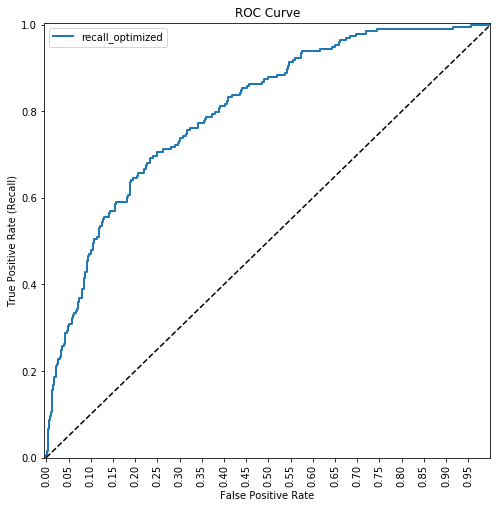

In [76]:
fpr, tpr, auc_thresholds = roc_curve(y_real, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [77]:
y = val_labels[:,1][val_labels[:,1]>0]
yhat = val_outputs[:,1][val_labels[:,1]>0]

In [78]:
RMSE = np.sqrt(np.mean((y - yhat)**2))
RMSE

1028.0481

In [79]:
y = np.array(Y_val)  #so we can tune the cut point
p = val_outputs[:,0]
f2 = val_outputs[:,1]
yhat = (1-p)*f2

In [80]:
RMSE = np.sqrt(np.mean((y - yhat)**2))
RMSE

924.465047901812

In [81]:
print(np.cov(y, p))

[[ 9.70960988e+05 -3.30129670e+01]
 [-3.30129670e+01  3.29389416e-02]]


In [82]:
print(np.cov(f2, p))

[[ 8.63582534e+04 -2.97105905e+01]
 [-2.97105905e+01  3.29389416e-02]]
